In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [43]:
# ler os dados com o geopandas
data = gpd.read_file('C:\Users\Fernandinho\Desktop\data-science\dados-geoespaciais\DF_Municipios_2022\DF_Municipios_2022.shp')

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (887075689.py, line 2)

In [10]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [11]:
data.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,5300108,Brasília,DF,5760.784,"POLYGON ((-48.01472 -16.04996, -48.01573 -16.0..."


<Axes: >

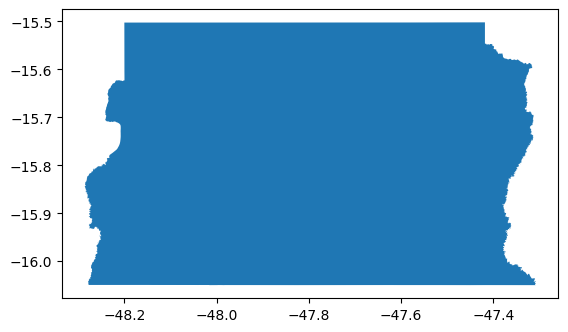

In [12]:
data.plot()

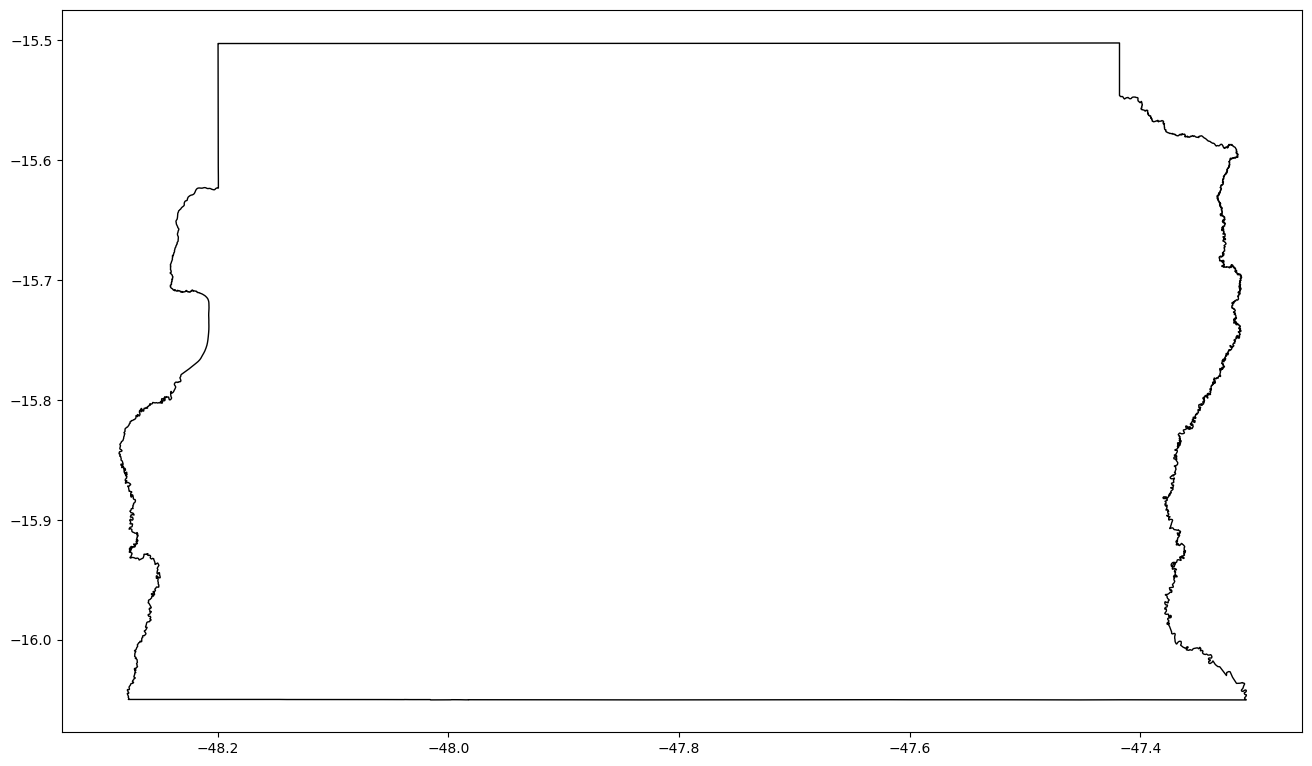

In [13]:
data.plot(figsize=(16,14), facecolor='white', edgecolor='black')
plt.show()

In [23]:
#filtrar somente o Distrito Federal
gdf_df = data[data['NM_MUN'] == 'Brasília']
gdf_df

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,5300108,Brasília,DF,5760.784,"POLYGON ((-48.01472 -16.04996, -48.01573 -16.0..."


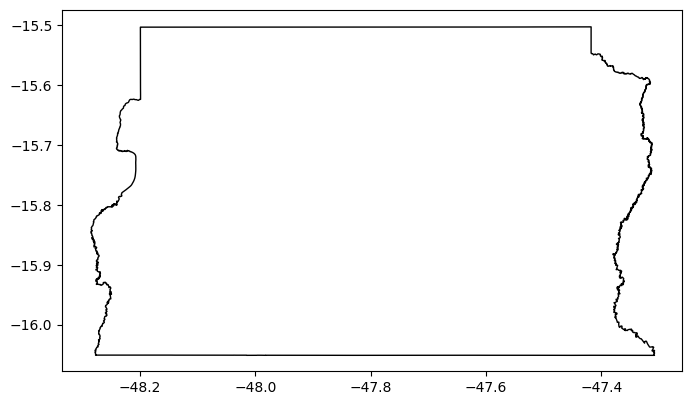

In [19]:
# mostrar a região filtrada
gdf_df = data[data['NM_MUN'] == 'Brasília']
gdf_df.plot(figsize=(8, 8), facecolor="white", edgecolor="black")
plt.show()

In [28]:
# salvar o geodataframe com formato geojson
filename = "DF_Municipios_2022.json"
gdf_df.to_file(filename, driver="GeoJSON")

In [29]:
gdf_df = gpd.read_file(filename, driver="GeoJSON")
gdf_df

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,5300108,Brasília,DF,5760.784,"POLYGON ((-48.01472 -16.04996, -48.01573 -16.0..."


In [44]:
# Importar os objetos geométricos da biblioteca shapely 
from shapely.geometry import Point, LineString, Polygon

In [45]:
# Criar uma geometria do tipo ponto
ponto = Point(5, 10)

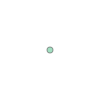

In [46]:
ponto

In [ ]:
print (ponto)

In [47]:
type(ponto)

shapely.geometry.point.Point

In [48]:
# Utilizando a função coords
list (ponto.coords)

[(5.0, 10.0)]

In [49]:
# Lendo x e y separadamente
x = ponto.x
y = ponto.y
print(x , y)

5.0 10.0


In [50]:
ponto_1 = Point(2,3)
ponto_2 = Point(5,7)
distancia = ponto_1.distance(ponto_2)
print("Distância entre os pontos:", distancia)

Distância entre os pontos: 5.0


In [54]:
# Criar um linha a partir de objetos pontos
ponto_1 = Point(2,3)
ponto_2 = Point(5,7)
ponto_3 = Point(2,10)
linha = LineString([ponto_1, ponto_2, ponto_3])

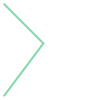

In [56]:
linha

In [55]:
print(linha)

LINESTRING (2 3, 5 7, 2 10)


In [57]:
type(linha)

shapely.geometry.linestring.LineString

In [ ]:
# Utilizando a função coords
list(linha.coords)

In [59]:
#lendo x e y separadamente
coordenadas_x = list(linha.xy[0])
coordenadas_y = list(linha.xy[1])

print('coordenadas_x:', coordenadas_x)
print('coordenadas_y:', coordenadas_y)


coordenadas_x: [2.0, 5.0, 2.0]
coordenadas_y: [3.0, 7.0, 10.0]


In [60]:
#pegar o comprimento da linha
linha.length

9.242640687119284

In [62]:
# Obter o ponto central (centróide)
print(linha.centroid)

POINT (3.5000000000000004 6.606601717798214)


In [64]:
# Criar um polygon passando as coordenadas
poly = Polygon([(2,3),(5,7),(2,10)])

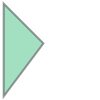

In [65]:
poly

In [66]:
print(poly)

POLYGON ((2 3, 5 7, 2 10, 2 3))


In [67]:
type(poly)

shapely.geometry.polygon.Polygon

In [69]:
#  Obter as coordenadas do poligono
list(poly.exterior.coords)

[(2.0, 3.0), (5.0, 7.0), (2.0, 10.0), (2.0, 3.0)]

In [71]:
# Calcular a área
poly_area = poly.area
print ('Área=', poly_area)

Área= 10.5


In [72]:
# Pegar o centroide do polígono
poly_centroid = poly.centroid
print('Centróide:', poly_centroid)

Centróide: POINT (3 6.666666666666667)


In [73]:
# Obter as coordenadas do bounding box
poly.bounds

(2.0, 3.0, 5.0, 10.0)

In [74]:
# Pegar as coordenadas da linha exterior
poly_exterior = poly.exterior
print('Exterior:', poly_exterior)

Exterior: LINEARRING (2 3, 5 7, 2 10, 2 3)


In [75]:
# Obter o tamanho da linha exterior
poly_exterior_length = poly.exterior.length
print('Comprimento exterior:', poly_exterior_length)